In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("email_marketing.csv")
df.head()


,index,name,account_number,email_name,sent_date,open_date,click_date,bounce_date,transaction_date,transaction_amount
0,0,Brian Harris,84256863,Email 1 - Welcome to Wanderlust Adventures,11/11/2021 22:24,11/11/2021 22:47,11/11/2021 22:51,NaN,NaN,NaN
1,4,Travis Gibson,87296226,Email 1 - Welcome to Wanderlust Adventures,12/5/2022 16:20,12/5/2022 16:25,NaN,NaN,NaN,NaN
2,8,Hector Hurst,14429475,Email 1 - Welcome to Wanderlust Adventures,3/10/2022 6:23,3/10/2022 7:13,NaN,NaN,NaN,NaN
3,12,Stephanie Scott,12583440,Email 1 - Welcome to Wanderlust Adventures,7/5/2022 15:10,7/5/2022 15:40,NaN,NaN,NaN,NaN
4,16,Hunter Jensen,46846333,Email 1 - Welcome to Wanderlust Adventures,1/23/2020 17:58,NaN,NaN,NaN,NaN,NaN


In [30]:
df['opened'] = df['open_date'].notna()
df['clicked'] = df['click_date'].notna()
df['converted'] = df['transaction_date'].notna()


In [31]:
p_open = df['opened'].mean()
print("Probability of Open:", round(p_open, 3))


Probability of Open: 0.827


In [32]:
p_click = df['clicked'].mean()
print("Probability of Click:", round(p_click, 3))


Probability of Click: 0.206


In [33]:
clicked_df = df[df['clicked'] == True]
p_convert_given_click = clicked_df['converted'].mean()

print("Probability of Conversion given Click:", round(p_convert_given_click, 3))


Probability of Conversion given Click: 0.102


In [34]:
cond_table = pd.crosstab(
    df['clicked'],
    df['converted'],
    normalize='index'
)

print(cond_table)


converted     False     True 
clicked                      
False      0.999611  0.000389
True       0.897734  0.102266


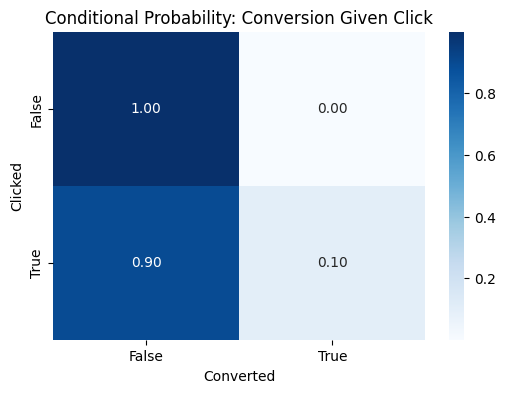

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(cond_table, annot=True, cmap="Blues", fmt=".2f")
plt.title("Conditional Probability: Conversion Given Click")
plt.ylabel("Clicked")
plt.xlabel("Converted")
plt.show()


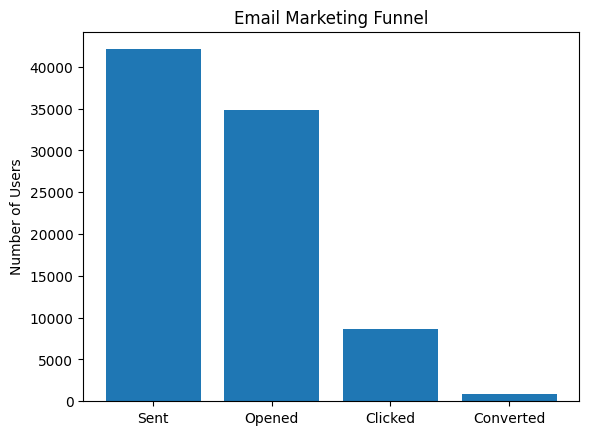

In [36]:
stages = {
    "Sent": len(df),
    "Opened": df['opened'].sum(),
    "Clicked": df['clicked'].sum(),
    "Converted": df['converted'].sum()
}

plt.bar(stages.keys(), stages.values())
plt.title("Email Marketing Funnel")
plt.ylabel("Number of Users")
plt.show()
